#### Let's start by loading a view basic Python packages: Numpy, matplotlib_pyplot, Pandas, and seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

#### keep all plots inline.

In [2]:
%matplotlib inline

#### the Social Security data have been included in a names.zip file that needs to be uncompressed. We can do that with the Python zipfile module.

In [3]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

#### we will now look at the contents of the directory names. For that, let's load the os module and use the listdir function

In [4]:
import os
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

#### The directory contains multiple files, probably one for each year. Let's have a look at one file, open it in read ('r') mode and look at the very first few lines, let's say the first 10 lines

In [5]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

#### Let's try to read one (2011 file) of these files with Pandas

In [6]:
names2011 = pd.read_csv('names/yob2011.txt')

In [29]:
names2011.describe()

,number
count,33869.000000
mean,107.671617
std,686.427147
min,5.000000
25%,7.000000
50%,11.000000
75%,29.000000
max,21816.000000


In [7]:
names2011

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236
...,...,...,...
33863,Zylar,M,5
33864,Zylas,M,5
33865,Zyran,M,5
33866,Zyshawn,M,5


#### Now let's see the first few rows with a head command 

In [8]:
names2011.head()

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236


#### Now let's specify the columns names by adding an argument, so that Sophia is not seen as a column

In [9]:
names2011 = pd.read_csv('names/yob2011.txt',names=['name','sex','number'])

In [10]:
names2011

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480
...,...,...,...
33864,Zylar,M,5
33865,Zylas,M,5
33866,Zyran,M,5
33867,Zyshawn,M,5


####  Let's now collect all these tables in a names_all list. Then loop over years from 1880 to 2014, so to extend the range to 2014+1.

#### We'll append the list, the result of reading a comma-separated file. 

#### We need to assemble the name of each file which we'll do by replacing the number into this generic string. And again, we specify the names of the columns.

In [11]:
names_all = []

for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names=['name','sex','number']))
    names_all[-1]['year'] = year

allyears = pd.concat(names_all)

In [12]:
names_all

[           name sex  number  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 ...         ...  ..     ...   ...
 1995     Woodie   M       5  1880
 1996     Worthy   M       5  1880
 1997     Wright   M       5  1880
 1998       York   M       5  1880
 1999  Zachariah   M       5  1880
 
 [2000 rows x 4 columns],            name sex  number  year
 0          Mary   F    6919  1881
 1          Anna   F    2698  1881
 2          Emma   F    2034  1881
 3     Elizabeth   F    1852  1881
 4      Margaret   F    1658  1881
 ...         ...  ..     ...   ...
 1930     Wiliam   M       5  1881
 1931     Wilton   M       5  1881
 1932       Wing   M       5  1881
 1933       Wood   M       5  1881
 1934     Wright   M       5  1881
 
 [1935 rows x 4 columns],            name sex  number  year
 0          Mary   F    8148  1882
 1          Anna   F    3143  1882
 

In [13]:
allyears

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014


In [14]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [15]:
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


#### Let's start analysing the data

#### Track the popularity of a name accross all year. While we do that, we will see how to set and sort indexes, how to select a row by the value of a MultiIndex, and how to make a stacked plot in matplotlib

In [16]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

In [17]:
allyears_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

In [18]:
allyears_indexed.loc['F','Mary']

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
...,...
2010,2862
2011,2701
2012,2565


In [19]:
def plotname(sex,name):
    data = allyears_indexed.loc[sex,name]
    
    pp.plot(data.index,data.values)

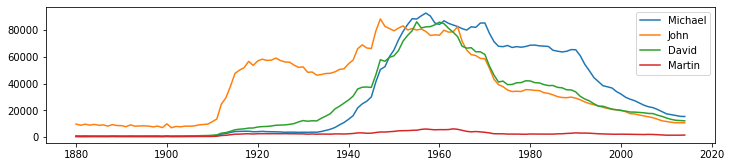

In [20]:
pp.figure(figsize=(12,2.5))

names = ['Michael','John','David','Martin']

for name in names:
    plotname('M',name)

pp.legend(names)